We now evaluate the models. We start by comparing the counts of false positives to false negatives for each model, but now they are evaluated on the same continuous day sample of daily living.

In [1]:
import sys
import os
import torch

sys.path.append(os.path.abspath('..')) #so we can import for the dir above

from RegNet import RegNet
from eval_in_time_domain import eval_in_time_domain

In [2]:
RECODING_TO_EVAL_ON = '/home/kuba/Documents/data/raw/kuba_watch_data/2024-07-10_06_42_46'
PATH_TO_BOUT_DIR = '/home/kuba/Documents/data/raw/listerine/3_final'


WINDOW_SIZE = 400
STRIDE = 50
CONFIDANCE_THRESHOLD = 0.8
OVERLAP_THRESHOLD = 0.45
MIN_BOUT_LEN = 400
NUM_BOUT_TO_SAMP = 20
DEVICE = 'cuda:0'

We know the results from model00 so we will not re-eval and jsut eval on our new model with 9% macro f1 !

In [ ]:
# #load model00
# model00_path = '/home/kuba/projects/medication-taking-data/new_start/week02/00_no_movment/94f1_with_filter_noMovmets.pth'
# model = RegNet()
# model.load_state_dict(torch.load(model00_path))

# #get false postive count

# TP, TN, FP, FN, total = eval_in_time_domain(model, path_to_daily_dir=RECODING_TO_EVAL_ON, path_to_bout_dir=PATH_TO_BOUT_DIR, window_size=WINDOW_SIZE, stride=STRIDE, 
#                                             confidance_threshold_for_mean=CONFIDANCE_THRESHOLD, overlap_threshold=OVERLAP_THRESHOLD, min_bout_len=MIN_BOUT_LEN, 
#                                             num_bouts_to_samp=NUM_BOUT_TO_SAMP, device=DEVICE)


WARNING we will sample bouts from all participants there will be data leakage, unless you specify who not to sample from
Bout shape - Acc: 454, Gyro: 454
Bout shape - Acc: 418, Gyro: 418
Bout shape - Acc: 519, Gyro: 519
Bout shape - Acc: 594, Gyro: 594
Bout shape - Acc: 523, Gyro: 523
Bout shape - Acc: 419, Gyro: 419
Bout shape - Acc: 700, Gyro: 700
Bout shape - Acc: 405, Gyro: 405
Bout shape - Acc: 547, Gyro: 547
Bout shape - Acc: 502, Gyro: 502
Bout shape - Acc: 497, Gyro: 497
Bout shape - Acc: 625, Gyro: 625
Bout shape - Acc: 645, Gyro: 645
Bout shape - Acc: 523, Gyro: 523
Bout shape - Acc: 670, Gyro: 670
Bout shape - Acc: 495, Gyro: 495
Bout shape - Acc: 424, Gyro: 424
Bout shape - Acc: 544, Gyro: 544
Bout shape - Acc: 732, Gyro: 732
Bout shape - Acc: 906, Gyro: 906
The recording partitioned into windows has shape of: torch.Size([51912, 6, 400])


/home/kuba/.virenv/base/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


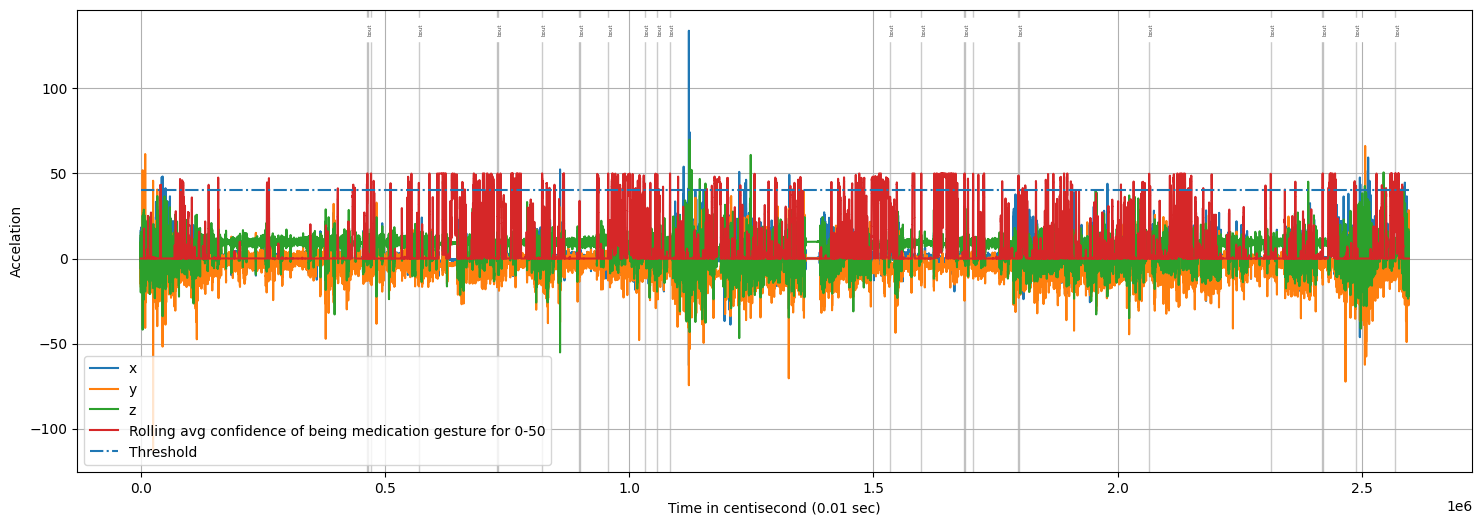

There are 420 FP's of 6489 total windows (FP is -> confidance over: 0.8 and less that 45.0% overlap with a real bout)
FP's are at rate of 6.47%
Fn's are at rate of 0.2312%
Normalized on True


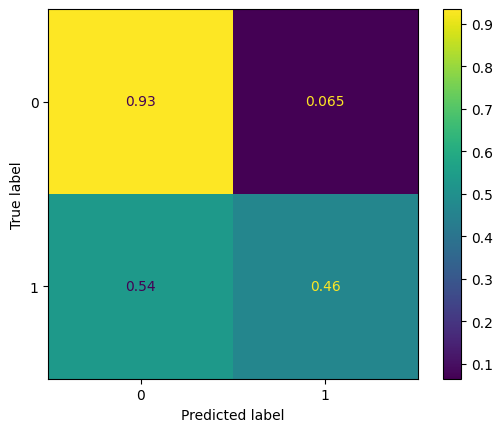

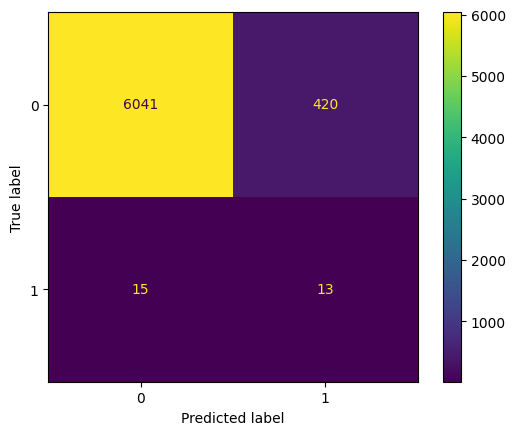

In [3]:
#load model01
model01_path = '/home/kuba/projects/medication-taking-data/new_start/week02/01_augment_loss_weights/95f1_87posweight.pth'
model = RegNet()
model.load_state_dict(torch.load(model01_path))
#get false postive count
TP, TN, FP, FN, total = eval_in_time_domain(model, path_to_daily_dir=RECODING_TO_EVAL_ON, path_to_bout_dir=PATH_TO_BOUT_DIR, window_size=WINDOW_SIZE, stride=STRIDE, 
                                            confidance_threshold_for_mean=CONFIDANCE_THRESHOLD, overlap_threshold=OVERLAP_THRESHOLD, min_bout_len=MIN_BOUT_LEN, 
                                            num_bouts_to_samp=NUM_BOUT_TO_SAMP, device=DEVICE)

____

Lets check out the 93 f1 model

WARNING we will sample bouts from all participants there will be data leakage, unless you specify who not to sample from
Bout shape - Acc: 495, Gyro: 495
Bout shape - Acc: 600, Gyro: 600
Bout shape - Acc: 995, Gyro: 995
Bout shape - Acc: 628, Gyro: 628
Bout shape - Acc: 448, Gyro: 448
Bout shape - Acc: 418, Gyro: 418
Bout shape - Acc: 426, Gyro: 426
Bout shape - Acc: 795, Gyro: 795
Bout shape - Acc: 470, Gyro: 470
Bout shape - Acc: 729, Gyro: 729
Bout shape - Acc: 416, Gyro: 416
Bout shape - Acc: 588, Gyro: 588
Bout shape - Acc: 479, Gyro: 479
Bout shape - Acc: 550, Gyro: 550
Bout shape - Acc: 628, Gyro: 628
Bout shape - Acc: 1164, Gyro: 1164
Bout shape - Acc: 446, Gyro: 446
Bout shape - Acc: 625, Gyro: 625
Bout shape - Acc: 544, Gyro: 544
Bout shape - Acc: 1331, Gyro: 1331
The recording partitioned into windows has shape of: torch.Size([51912, 6, 400])


/home/kuba/.virenv/base/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


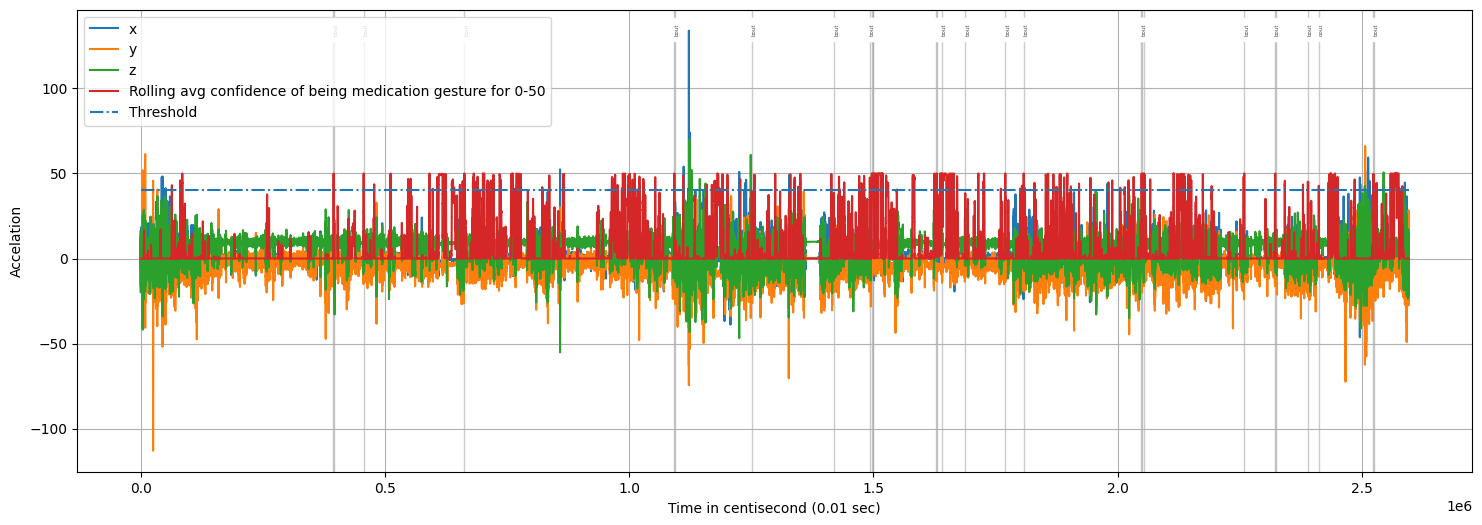

There are 356 FP's of 6489 total windows (FP is -> confidance over: 0.8 and less that 45.0% overlap with a real bout)
FP's are at rate of 5.49%
Fn's are at rate of 0.2774%
Normalized on True


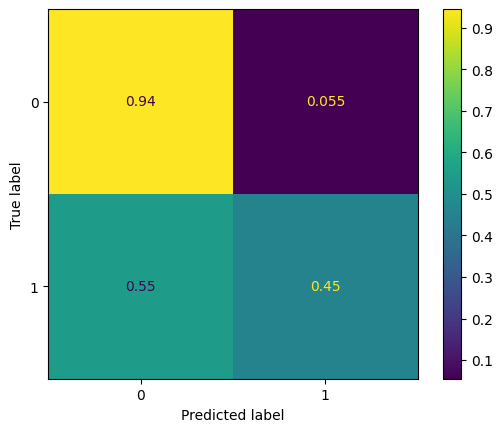

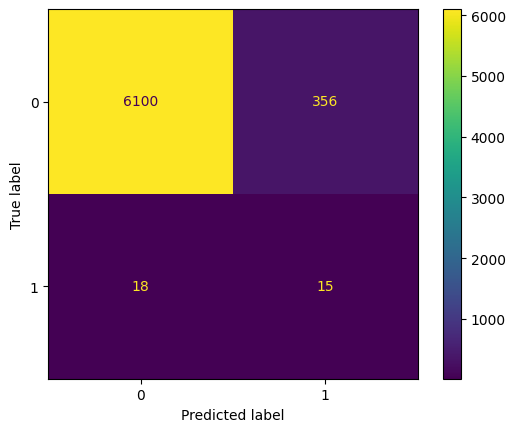

In [4]:
#load model01
model01_path = '/home/kuba/projects/medication-taking-data/new_start/week02/01_augment_loss_weights/93f1_87posweight.pth'
model = RegNet()
model.load_state_dict(torch.load(model01_path))
#get false postive count
TP, TN, FP, FN, total = eval_in_time_domain(model, path_to_daily_dir=RECODING_TO_EVAL_ON, path_to_bout_dir=PATH_TO_BOUT_DIR, window_size=WINDOW_SIZE, stride=STRIDE, 
                                            confidance_threshold_for_mean=CONFIDANCE_THRESHOLD, overlap_threshold=OVERLAP_THRESHOLD, min_bout_len=MIN_BOUT_LEN, 
                                            num_bouts_to_samp=NUM_BOUT_TO_SAMP, device=DEVICE)